In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./letter to shareholder/*.txt")
    return files
textfile=textfile()
textfile

['./letter to shareholder/2891106shareholders.txt',
 './letter to shareholder/2884106shareholders.txt',
 './letter to shareholder/2890105shareholders.txt',
 './letter to shareholder/2891105shareholders.txt',
 './letter to shareholder/2890106shareholders.txt',
 './letter to shareholder/2884105shareholders.txt']

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/zz/bqrx4v8s4cq4vszqlfzpp6_40000gn/T/jieba.cache
Loading model cost 0.657 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stopwords = ['致股','我', '對', '\n', '年', '月', '的', '1', '2', '(', ')', '/', '於', '大同', '公司', '4', '106', '臺', '本', '人', '為', '之', '北', '5', '有', '元','一事','TCRI','ai','致股']
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [5]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(5):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['壹 東報 告書 親愛的 股東 女士 先生 全球 在 美國 貿易 保護 主義興起 退出 跨 太平洋 經濟夥伴 協定 歐 盟主 要國家 領導人 改選 等 不確 定性 因素 影響 下 全球 政治局 勢變化 甚 鉅 但 經濟 影響 低 預期 故 全球 景氣 以 穩健 步伐 復 甦 灣經濟 也 隨著 全球 經濟景氣 逐漸 復 甦 而 緩步 上升 雖然 總體 經濟 逐漸 擺脫 陰霾 但金 控業者 面臨 挑戰 仍 未減 在 市場 資金過 剩下 國內 金融 業 依然 處 激烈 之價格 競爭 中 使得 金控業者 在 經營 上 更加 困難 在 面 如此 艱困 環境 中國信 託 金融 控股 股 憑 藉 著 穩固 客戶 基盤 及 集團 綜效 發揮下 仍 穩健地 前進 維持 精彩 表現 營業 收支 預算 執行 情形 良好 中信 金控稅 後 獲利達 到 新 幣億元 歷年次 高 若 排除 因 併 購東京 之星 銀行 一次性 獲利 則締造 金控 成立 以來 新 猷 足見 中信 金控 在 整合 集團 資源 以 發揮 各 子公司 合作 綜效 成果 顯著 展望 未來 中信 金控 將持續 拓展 企業版 圖 佈 建國際 網絡 藉以 提供 全球性 金融 服務 同時 也 將落實 合作 共營 經營 方針 發揮 金控 最大 效益 中信 金 控今 後 也將 秉持 品牌 精神 客戶 員工 股東及 社會 創造 共同利益 以 守護 與 創造 企業 使命 持續 強化 治理 落實 企業 社會責任 以 關心 專業 信賴 品牌 特質 服務 客戶 邁向 治理 最佳 客 戶及 股東 心目 中 最 值得 信賴 金融 品牌 營業 計畫 實施 概況 及 實施 成果 著眼 國際 市場 佈 局亞洲 全域 中信 金控 以 灣為 積極 佈 局 海外 市場 本年度 也 多 斬 獲 金管會 同意 中信 銀行 申設 大陸 深圳 分行 未來 深圳 分行 將 深耕 珠三角 地區 掌握 當地 重點 發展 產業 鏈 並結合 在 灣 香港 及海 內外 分支 據點 打造 全方位 跨境 金融 平 提供 各地 客戶 貿易 融資 國際 保理 等 完整 金融 產品 及 服務 東南亞 方面 則 配合 政府 新 南向 政策 密切 尋找 具有 客戶 基盤 網點 及業務 具互 補性 之標 進行 策略 投資 參股 甚至 併 購 中信 銀行 已 完成 與 泰國 股權 投資 取得 股

In [6]:
corpus.append(st)
corpus

['壹 東報 告書 親愛的 股東 女士 先生 全球 在 美國 貿易 保護 主義興起 退出 跨 太平洋 經濟夥伴 協定 歐 盟主 要國家 領導人 改選 等 不確 定性 因素 影響 下 全球 政治局 勢變化 甚 鉅 但 經濟 影響 低 預期 故 全球 景氣 以 穩健 步伐 復 甦 灣經濟 也 隨著 全球 經濟景氣 逐漸 復 甦 而 緩步 上升 雖然 總體 經濟 逐漸 擺脫 陰霾 但金 控業者 面臨 挑戰 仍 未減 在 市場 資金過 剩下 國內 金融 業 依然 處 激烈 之價格 競爭 中 使得 金控業者 在 經營 上 更加 困難 在 面 如此 艱困 環境 中國信 託 金融 控股 股 憑 藉 著 穩固 客戶 基盤 及 集團 綜效 發揮下 仍 穩健地 前進 維持 精彩 表現 營業 收支 預算 執行 情形 良好 中信 金控稅 後 獲利達 到 新 幣億元 歷年次 高 若 排除 因 併 購東京 之星 銀行 一次性 獲利 則締造 金控 成立 以來 新 猷 足見 中信 金控 在 整合 集團 資源 以 發揮 各 子公司 合作 綜效 成果 顯著 展望 未來 中信 金控 將持續 拓展 企業版 圖 佈 建國際 網絡 藉以 提供 全球性 金融 服務 同時 也 將落實 合作 共營 經營 方針 發揮 金控 最大 效益 中信 金 控今 後 也將 秉持 品牌 精神 客戶 員工 股東及 社會 創造 共同利益 以 守護 與 創造 企業 使命 持續 強化 治理 落實 企業 社會責任 以 關心 專業 信賴 品牌 特質 服務 客戶 邁向 治理 最佳 客 戶及 股東 心目 中 最 值得 信賴 金融 品牌 營業 計畫 實施 概況 及 實施 成果 著眼 國際 市場 佈 局亞洲 全域 中信 金控 以 灣為 積極 佈 局 海外 市場 本年度 也 多 斬 獲 金管會 同意 中信 銀行 申設 大陸 深圳 分行 未來 深圳 分行 將 深耕 珠三角 地區 掌握 當地 重點 發展 產業 鏈 並結合 在 灣 香港 及海 內外 分支 據點 打造 全方位 跨境 金融 平 提供 各地 客戶 貿易 融資 國際 保理 等 完整 金融 產品 及 服務 東南亞 方面 則 配合 政府 新 南向 政策 密切 尋找 具有 客戶 基盤 網點 及業務 具互 補性 之標 進行 策略 投資 參股 甚至 併 購 中信 銀行 已 完成 與 泰國 股權 投資 取得 股

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [7]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  2376


In [8]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (7, 2376)


<7x2376 sparse matrix of type '<class 'numpy.float64'>'
	with 4673 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [9]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
中信 0.5862246945819255 0 88
事業 0.05862246945819254 0 138
企業 0.0591898260479148 0 213
保險 0.05862246945819254 0 255
全球 0.05179109779192545 0 335
品牌 0.10902697966760616 0 571
子公司 0.05032014446197207 0 729
完善 0.07516281531814542 0 744
客戶 0.18489467559782438 0 750
將持續 0.058706835205634085 0 785
市場 0.10902697966760616 0 839
強化 0.0670935259492961 0 903
打擊 0.10593326110035474 0 986
打造 0.05179109779192545 0 987
投資 0.054380786940536587 0 1001
持續 0.06658855430390415 0 1019
提升 0.0739872825598935 0 1078
整合 0.05716325840507949 0 1142
數位 0.0887847390718722 0 1148
旗下 0.054380786940536587 0 1183
服務 0.1183796520958296 0 1245
未來 0.08138601081588284 0 1272
機構 0.06669046813925941 0 1350
治理 0.11741367041126817 0 1408
洗錢 0.08793370418728881 0 1416
海外 0.05179109779192545 0 1428
環境 0.06658855430390415 0 1550
產品 0.05179109779192545 0 1561
發展 0.0739872825598935 0 1581
發揮 0.0652569443286439 0 1582
社會 0.05716325840507949 0 1620
穩定 0.0591898260479148 0 1649
競爭 0.050108543545430276 0 1662
管理 0.0517

顧客 0.19840266842090035 5 2334
----Document 6----
中小 0.07241466227515256 6 100
亞洲 0.0674837342145548 6 150
企業 0.15746204650062787 6 213
便利 0.09521657859919182 6 241
信用卡 0.05793172982012204 6 263
價值 0.05623644517879566 6 290
億元 0.07873102325031393 6 292
兆元 0.05712994715951509 6 312
分行 0.07873102325031393 6 385
創新 0.0674837342145548 6 422
創造 0.0674837342145548 6 427
區域 0.07241466227515256 6 462
因應 0.05793172982012204 6 600
團隊 0.05099662081581829 6 627
地區 0.05099662081581829 6 634
專業 0.0674837342145548 6 798
布局 0.08266777850870848 6 842
應用 0.05712994715951509 6 947
成長 0.11247289035759132 6 967
我們 0.13330321003886852 6 968
打造 0.05623644517879566 6 987
持續 0.07873102325031393 6 1019
提供 0.11247289035759132 6 1076
支付 0.07649493122372743 6 1106
整合 0.1303463920952746 6 1142
數位 0.11247289035759132 6 1148
方面 0.0674837342145548 6 1180
智能 0.05712994715951509 6 1208
服務 0.11247289035759132 6 1245
未來 0.07873102325031393 6 1272
核心 0.05623644517879566 6 1292
正向 0.07617326287935344 6 1368
永續 0.063745776019

### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [41]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif
0,report,0.000000,0.039836,0.000000,0.000000,0.000000,0.000000,0.000000
1,the,0.000000,0.000000,0.016246,0.000000,0.000000,0.000000,0.000000
2,一個,0.000000,0.000000,0.016246,0.000000,0.000000,0.000000,0.000000
3,一定,0.000000,0.000000,0.026972,0.000000,0.014760,0.000000,0.000000
4,一家,0.000000,0.000000,0.000000,0.000000,0.000000,0.044558,0.044558
5,一年,0.012527,0.000000,0.023054,0.016568,0.000000,0.000000,0.000000
6,一方面,0.000000,0.039836,0.000000,0.000000,0.000000,0.000000,0.000000
7,一次,0.012527,0.000000,0.011527,0.016568,0.000000,0.000000,0.000000
8,一次性,0.017656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,一步,0.012527,0.000000,0.023054,0.000000,0.050466,0.000000,0.000000


In [11]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,doc0_tfdif,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif
2,一個,0.000000,0.000000,0.016246,0.000000,0.000000,0.000000,0.000000
3,一定,0.000000,0.000000,0.026972,0.000000,0.014760,0.000000,0.000000
4,一家,0.000000,0.000000,0.000000,0.000000,0.000000,0.044558,0.044558
5,一年,0.012527,0.000000,0.023054,0.016568,0.000000,0.000000,0.000000
6,一方面,0.000000,0.039836,0.000000,0.000000,0.000000,0.000000,0.000000
7,一次,0.012527,0.000000,0.011527,0.016568,0.000000,0.000000,0.000000
8,一次性,0.017656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,一步,0.012527,0.000000,0.023054,0.000000,0.050466,0.000000,0.000000
10,一段,0.000000,0.000000,0.016246,0.000000,0.000000,0.000000,0.000000
11,一直,0.000000,0.000000,0.032493,0.000000,0.000000,0.000000,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [12]:
writer = pd.ExcelWriter('tfidf.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [13]:
tfarray=tfidf.toarray()
tfarray

array([[0.        , 0.        , 0.        , ..., 0.01765554, 0.        ,
        0.        ],
       [0.03983584, 0.        , 0.        , ..., 0.        , 0.        ,
        0.02453965],
       [0.        , 0.01624628, 0.01624628, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01095372],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02227896,
        0.01653356],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02227896,
        0.01653356]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [14]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_count'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_count,doc2_count,doc3_count,doc4_count,doc5_count,doc6_count,doc7_count
0,report,0,1,0,0,0,0,0
1,the,0,0,1,0,0,0,0
2,一個,0,0,1,0,0,0,0
3,一定,0,0,2,0,1,0,0
4,一家,0,0,0,0,0,2,2
5,一年,1,0,2,1,0,0,0
6,一方面,0,1,0,0,0,0,0
7,一次,1,0,1,1,0,0,0
8,一次性,1,0,0,0,0,0,0
9,一步,1,0,2,0,4,0,0


In [15]:
df.head()

,words,doc1_count,doc2_count,doc3_count,doc4_count,doc5_count,doc6_count,doc7_count
0,report,0,1,0,0,0,0,0
1,the,0,0,1,0,0,0,0
2,一個,0,0,1,0,0,0,0
3,一定,0,0,2,0,1,0,0
4,一家,0,0,0,0,0,2,2


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [16]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_count,doc2_count,doc3_count,doc4_count,doc5_count,doc6_count,doc7_count
2,一個,0,0,1,0,0,0,0
3,一定,0,0,2,0,1,0,0
4,一家,0,0,0,0,0,2,2
5,一年,1,0,2,1,0,0,0
6,一方面,0,1,0,0,0,0,0
7,一次,1,0,1,1,0,0,0
8,一次性,1,0,0,0,0,0,0
9,一步,1,0,2,0,4,0,0
10,一段,0,0,1,0,0,0,0
11,一直,0,0,2,0,0,0,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [17]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

allcount=vec.vocabulary_
remove_list = ['']
font = r"/Users/liangpeiru/Downloads/碩二/資本市場/wqy-microhei.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(allcount)
plt.imshow(wordcloud)

### doc1文字雲

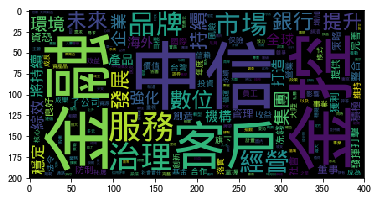

In [19]:
tfidf_dict1=dict(zip(df.words, df.doc1_count))
tfidf_dict1
remove_list = ['的','，','年','為','大同','在','與','於','股東','更','年度','已']
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict1)
plt.imshow(wordcloud)

In [20]:
ten = sorted(tfidf_dict1.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('中信', 40),
 ('金融', 36),
 ('金控', 34),
 ('客戶', 17),
 ('服務', 16),
 ('治理', 14),
 ('品牌', 13),
 ('市場', 13),
 ('經營', 13),
 ('數位', 12)]

In [21]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0x1a1baad588>,
 <a list of 10 Text xticklabel objects>)

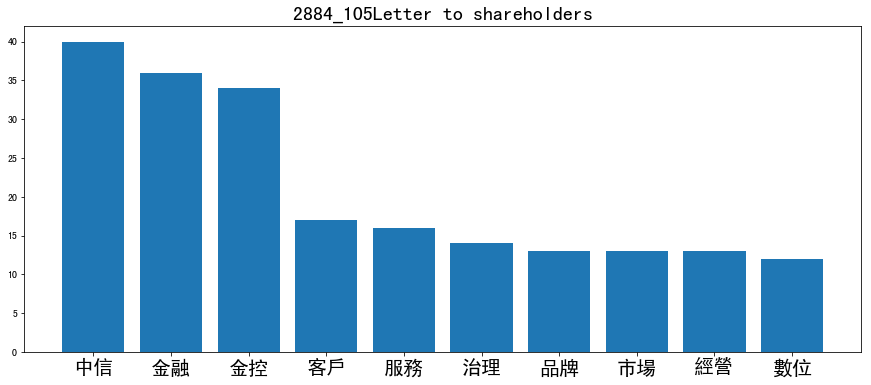

In [22]:
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("2884_105Letter to shareholders",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

### doc2文字雲

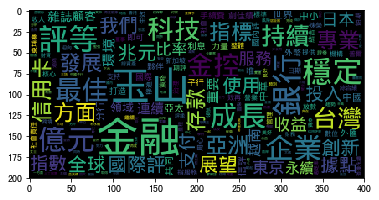

In [23]:
tfidf_dict2=dict(zip(df.words, df.doc2_count))
tfidf_dict2
remove_list = ['的','，','年','為','大同','在','與','於','股東','更','年度','已']
for item in remove_list:
    tfidf_dict2.pop(item, None)
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict2)
plt.imshow(wordcloud)

In [24]:
ten = sorted(tfidf_dict2.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('金融', 18),
 ('玉山', 16),
 ('銀行', 9),
 ('穩定', 8),
 ('評等', 8),
 ('企業', 7),
 ('億元', 7),
 ('成長', 7),
 ('最佳', 6),
 ('科技', 6)]

In [25]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0x1a1b75ffd0>,
 <a list of 10 Text xticklabel objects>)

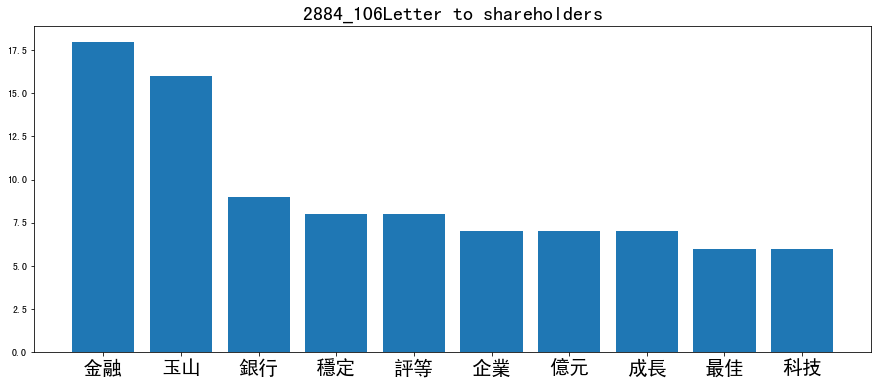

In [26]:
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("2884_106Letter to shareholders",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

### doc3文字雲

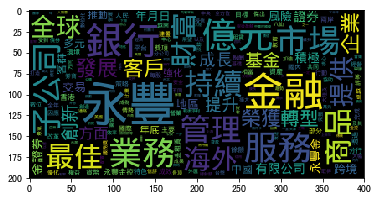

In [27]:
tfidf_dict3=dict(zip(df.words, df.doc3_count))
tfidf_dict3
remove_list = ['的','，','年','為','大同','在','與','於','股東','更','年度','已']
for item in remove_list:
    tfidf_dict3.pop(item, None)
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict3)
plt.imshow(wordcloud)

In [28]:
ten = sorted(tfidf_dict3.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('永豐', 38),
 ('金融', 27),
 ('銀行', 23),
 ('億元', 21),
 ('服務', 19),
 ('業務', 18),
 ('市場', 17),
 ('子公司', 16),
 ('管理', 15),
 ('商品', 13)]

([<matplotlib.axis.XTick at 0x1a0a4442b0>,
 <a list of 10 Text xticklabel objects>)

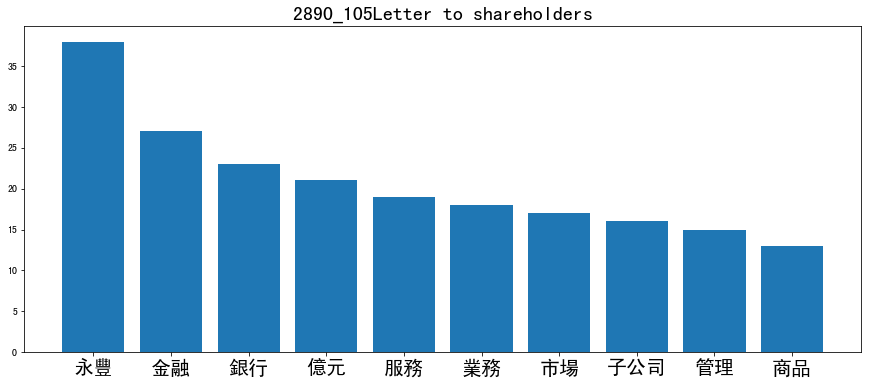

In [29]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])
    
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("2890_105Letter to shareholders",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

### doc4文字雲

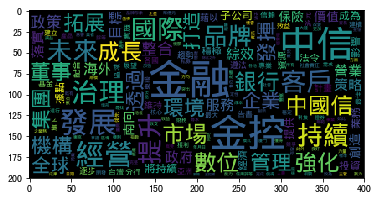

In [30]:
tfidf_dict4=dict(zip(df.words, df.doc4_count))
tfidf_dict4
remove_list = ['的','，','年','為','大同','在','與','於','股東','更','年度','已']
for item in remove_list:
    tfidf_dict4.pop(item, None)
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict4)
plt.imshow(wordcloud)

In [31]:
ten = sorted(tfidf_dict4.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('金融', 29),
 ('金控', 24),
 ('中信', 23),
 ('發展', 13),
 ('經營', 13),
 ('國際', 11),
 ('治理', 11),
 ('客戶', 10),
 ('持續', 10),
 ('提升', 10)]

([<matplotlib.axis.XTick at 0x1a0b64f9e8>,
 <a list of 10 Text xticklabel objects>)

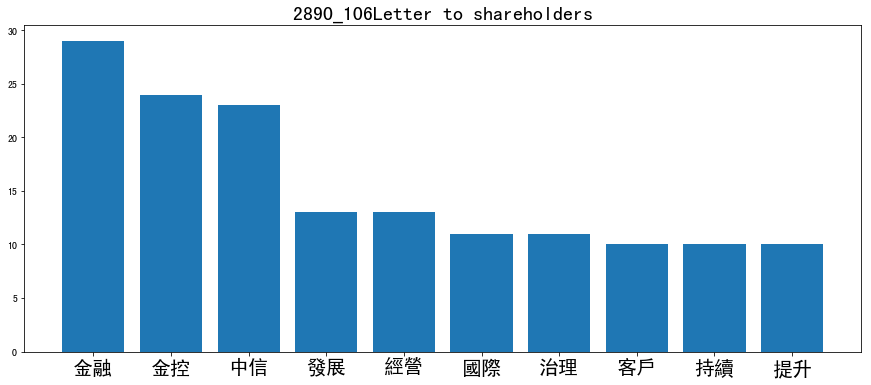

In [32]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])
    
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("2890_106Letter to shareholders",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

### doc5文字雲

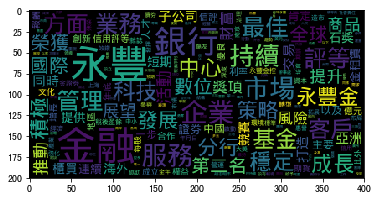

In [33]:
tfidf_dict5=dict(zip(df.words, df.doc5_count))
tfidf_dict5
remove_list = ['的','，','年','為','大同','在','與','於','股東','更','年度','已']
for item in remove_list:
    tfidf_dict5.pop(item, None)
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict5)
plt.imshow(wordcloud)

In [34]:
ten = sorted(tfidf_dict5.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('金融', 36),
 ('永豐', 35),
 ('銀行', 23),
 ('企業', 15),
 ('市場', 14),
 ('服務', 14),
 ('持續', 13),
 ('最佳', 11),
 ('業務', 11),
 ('管理', 11)]

([<matplotlib.axis.XTick at 0x1a0b45fe80>,
 <a list of 10 Text xticklabel objects>)

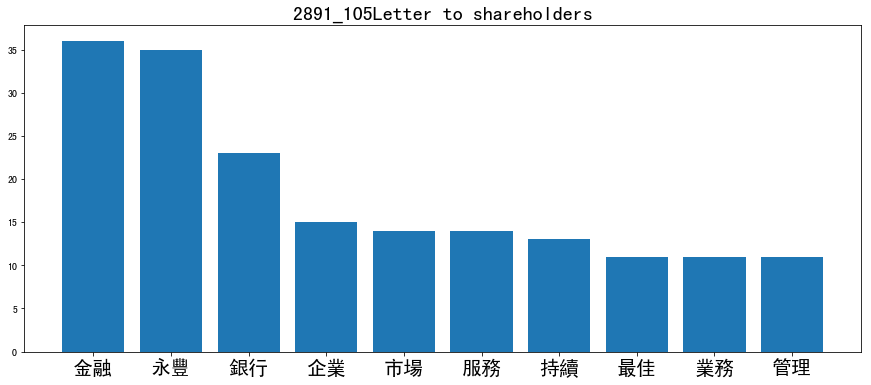

In [35]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])
    
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("2891_105Letter to shareholders",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

### doc6文字雲

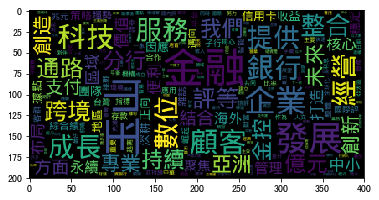

In [36]:
tfidf_dict6=dict(zip(df.words, df.doc6_count))
tfidf_dict6
remove_list = ['的','，','年','為','大同','在','與','於','股東','更','年度','已']
for item in remove_list:
    tfidf_dict6.pop(item, None)
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict6)
plt.imshow(wordcloud)

In [37]:
ten = sorted(tfidf_dict6.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('金融', 26),
 ('玉山', 25),
 ('發展', 17),
 ('企業', 14),
 ('科技', 12),
 ('顧客', 12),
 ('銀行', 11),
 ('成長', 10),
 ('提供', 10),
 ('數位', 10)]

([<matplotlib.axis.XTick at 0x1a0b73c748>,
 <a list of 10 Text xticklabel objects>)

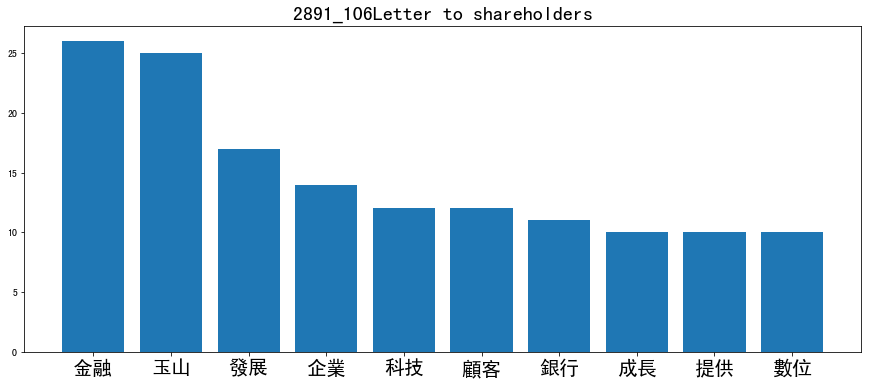

In [38]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])
    
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("2891_106Letter to shareholders",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

In [39]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[-0.41007844, -0.55126638],
       [ 0.44242586,  0.0210121 ],
       [-0.40680842,  0.55428267],
       [-0.3771656 , -0.53977598],
       [-0.37772619,  0.53553261],
       [ 0.5646764 , -0.00989251],
       [ 0.5646764 , -0.00989251]])

No handles with labels found to put in legend.


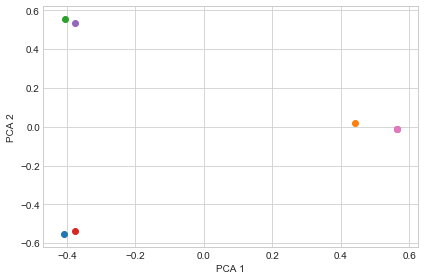

In [40]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()